In [96]:
# 1. IMPORTS
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,silhouette_score)



In [97]:
sns.set(style="whitegrid", context="notebook")

In [98]:
# 2. LOAD DATA
df = pd.read_csv(r"G:\Power BI Project\DryBeanDataset\Dry_Bean_Dataset.csv")
print("\nShape of data:", df.shape)
print("\n", df.head())
print("\n", df.describe())
dup= df.duplicated().sum()
print("\nduplicates:" ,dup)
df = df.drop_duplicates()
df.shape
dup= df.duplicated().sum()
print("\nduplicates:" ,dup)


Shape of data: (13611, 17)

     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  


In [99]:
# 3. BASIC INFO & QUICK CHECKS (EDA)
print("\nInfo: ")
print(df.info())

print("\nMissing values per column: ")
print(df.isna().sum())

print("\nClass distribution: ")
print(df['Class'].value_counts())



Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float6

In [100]:
# 4. EDA – DISTRIBUTIONS & CORRELATIONS
feature_cols = df.columns.drop("Class")
target_col = "Class"
X = df[feature_cols].values
y = df[target_col].values


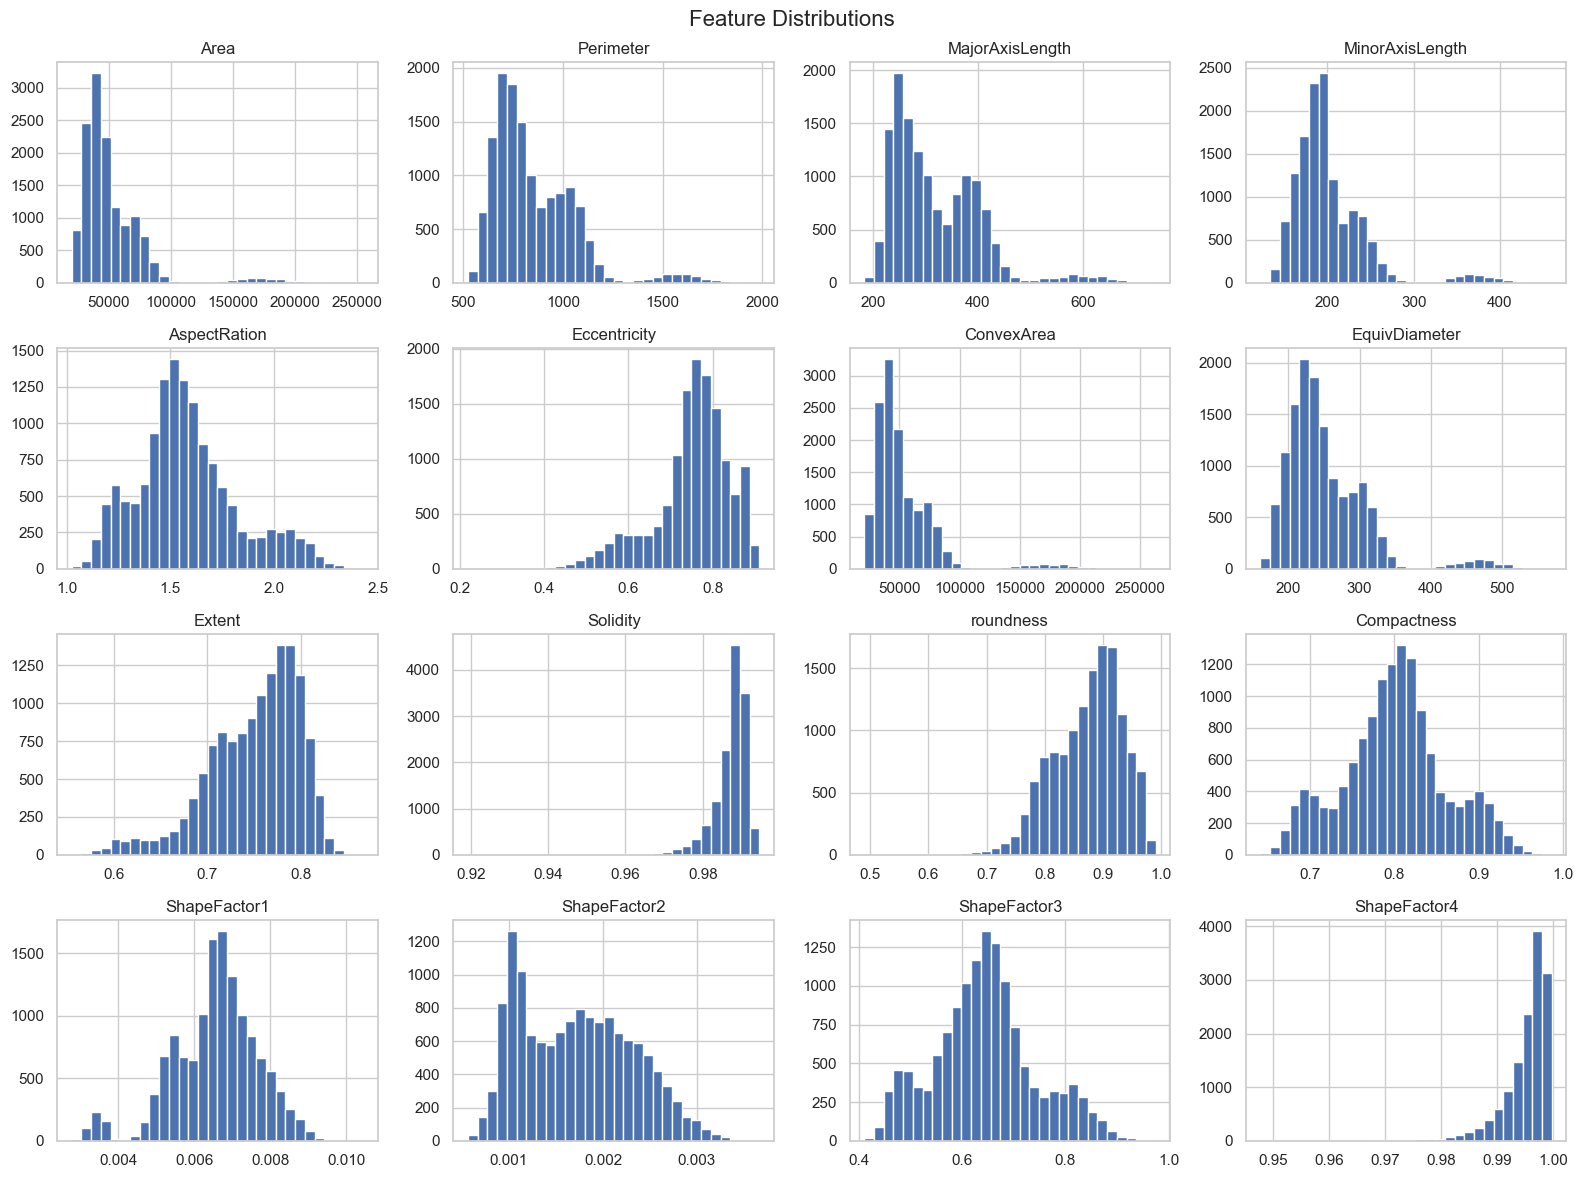

In [102]:
# Histograms for a few key features skewness
df[feature_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


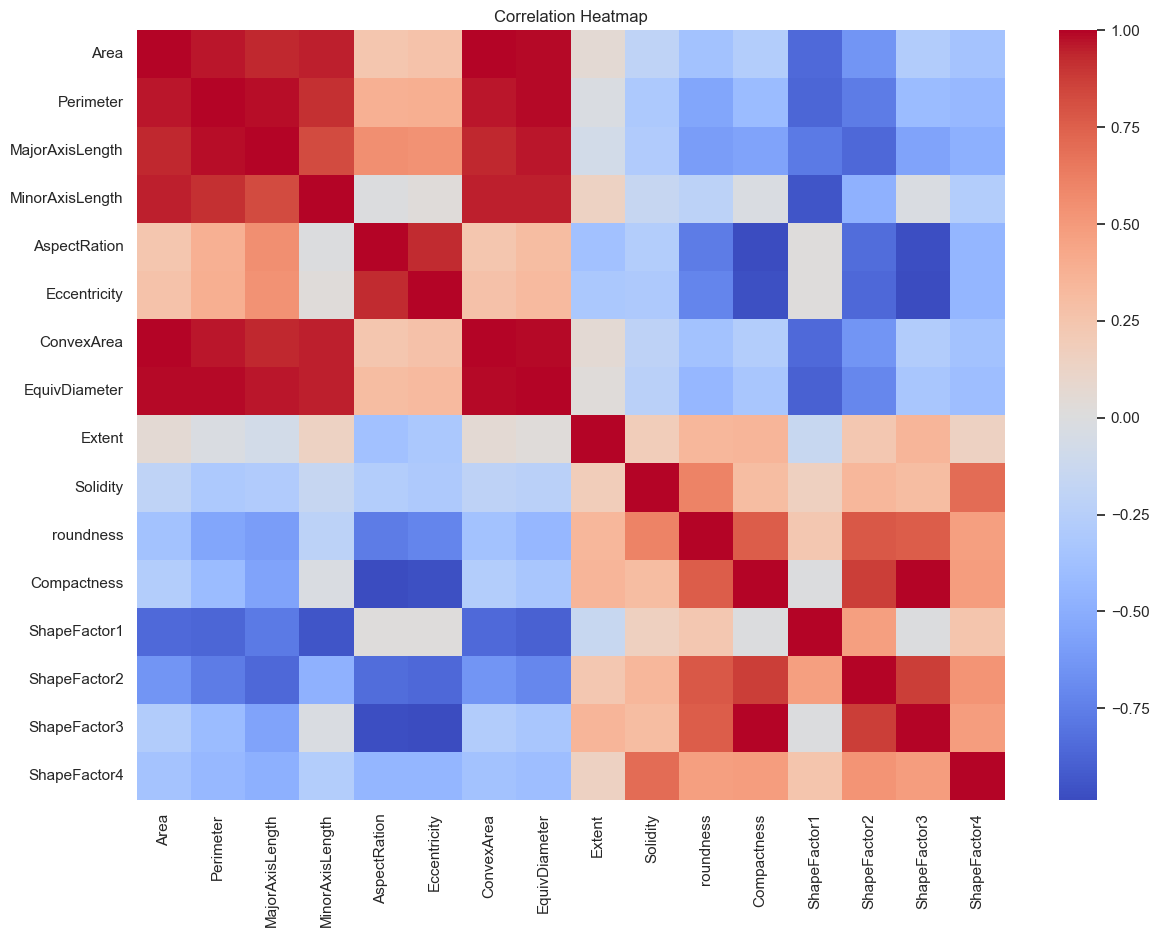

In [103]:
# Correlation heatmap 
plt.figure(figsize=(14, 10))
corr = df[feature_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

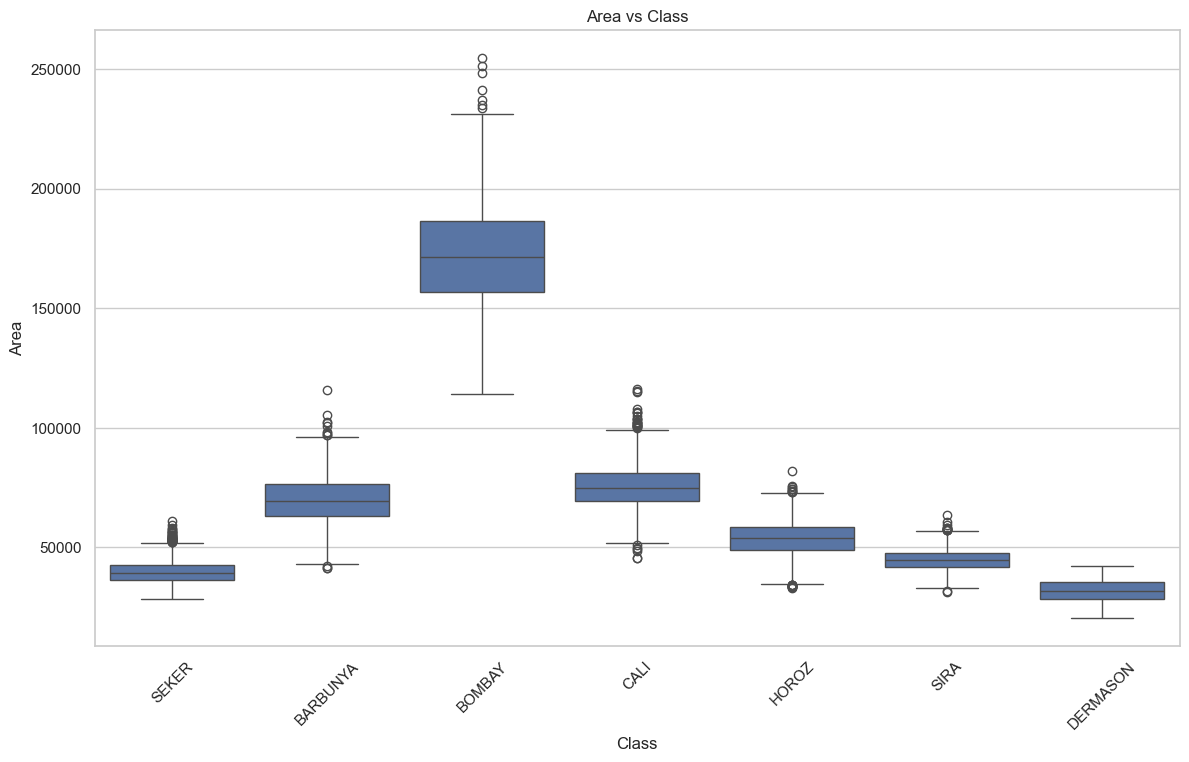

In [104]:
# Boxplots of selected features vs class
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Class", y="Area")
plt.title("Area vs Class")
plt.xticks(rotation=45)
plt.show()

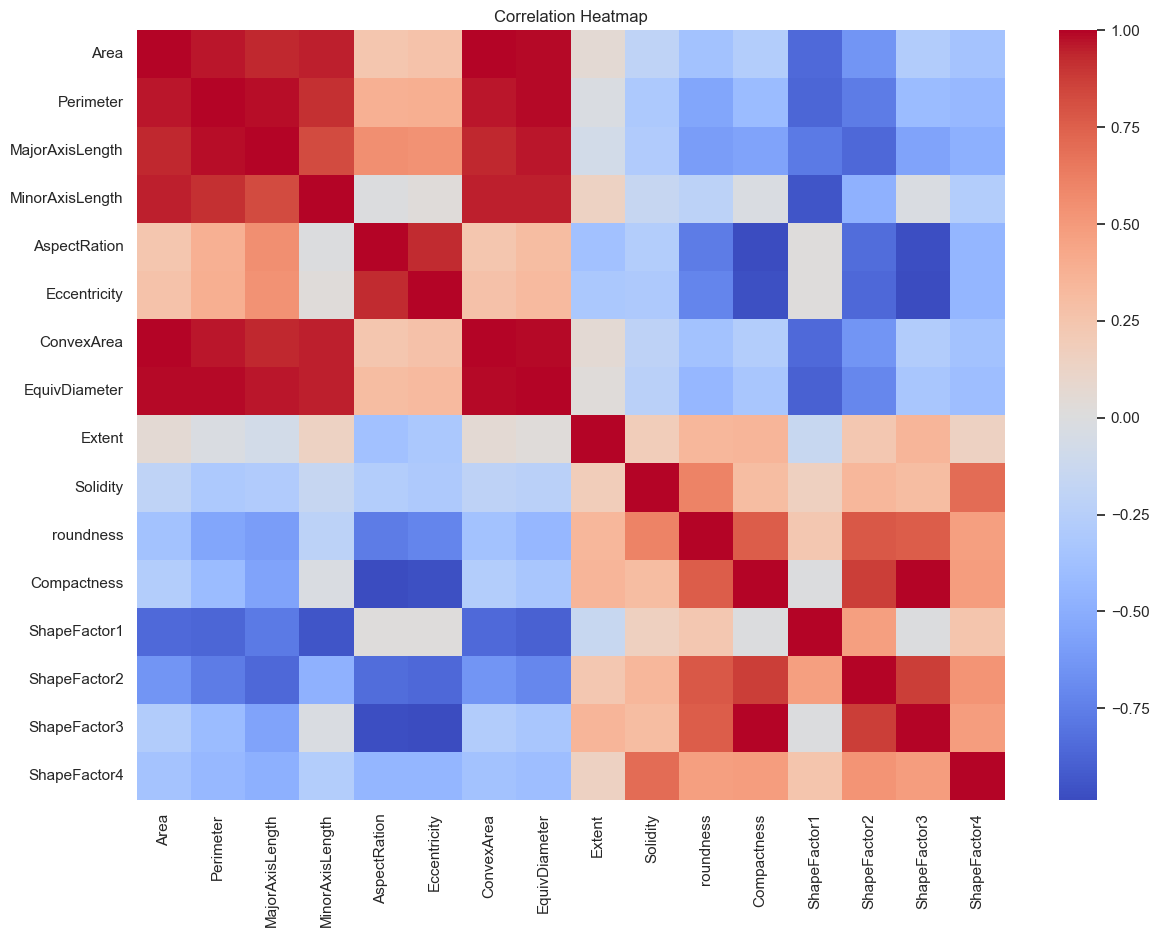

In [105]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df[feature_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


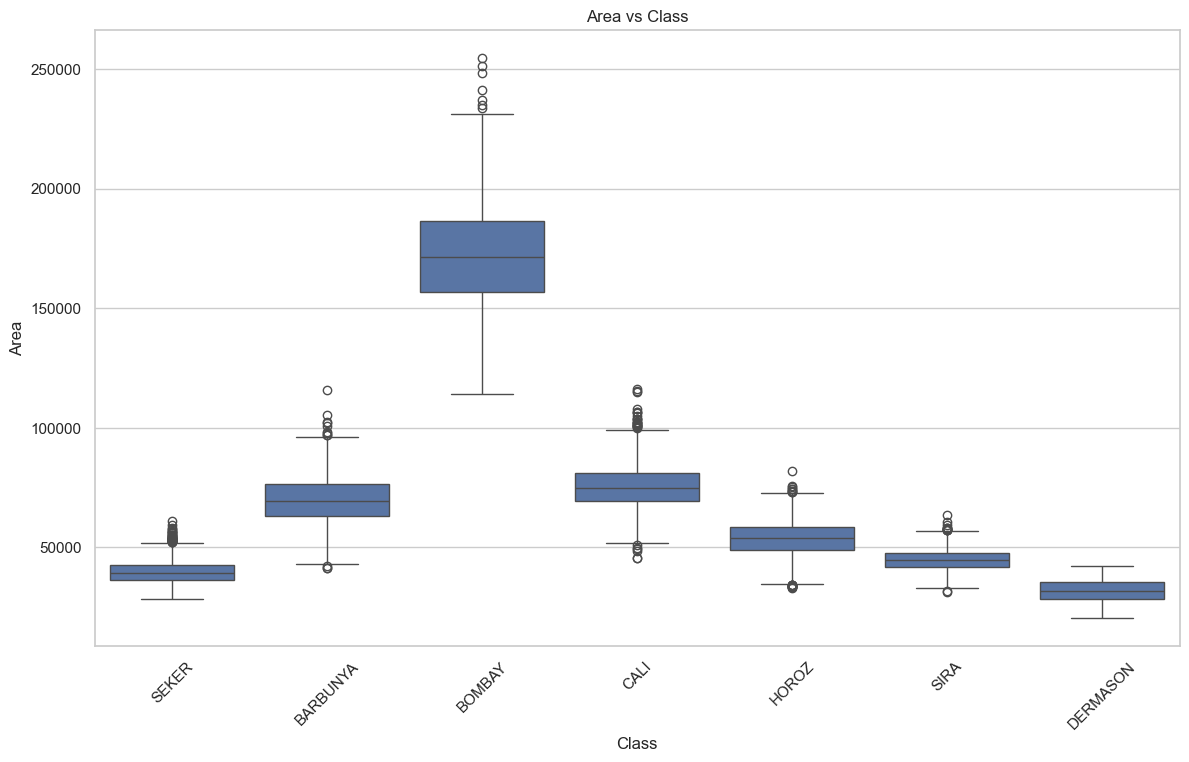

In [106]:
# Boxplots of selected features vs class
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Class", y="Area")
plt.title("Area vs Class")
plt.xticks(rotation=45)
plt.show()

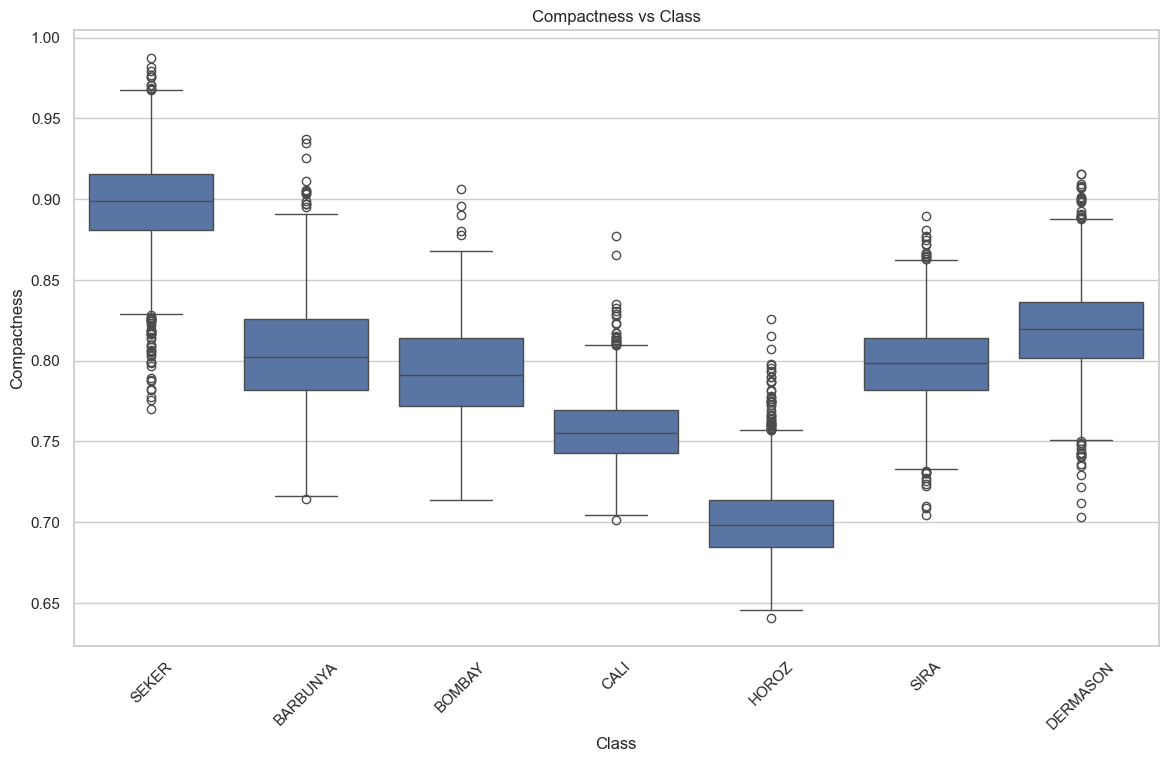

In [107]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Class", y="Compactness")
plt.title("Compactness vs Class")
plt.xticks(rotation=45)
plt.show()

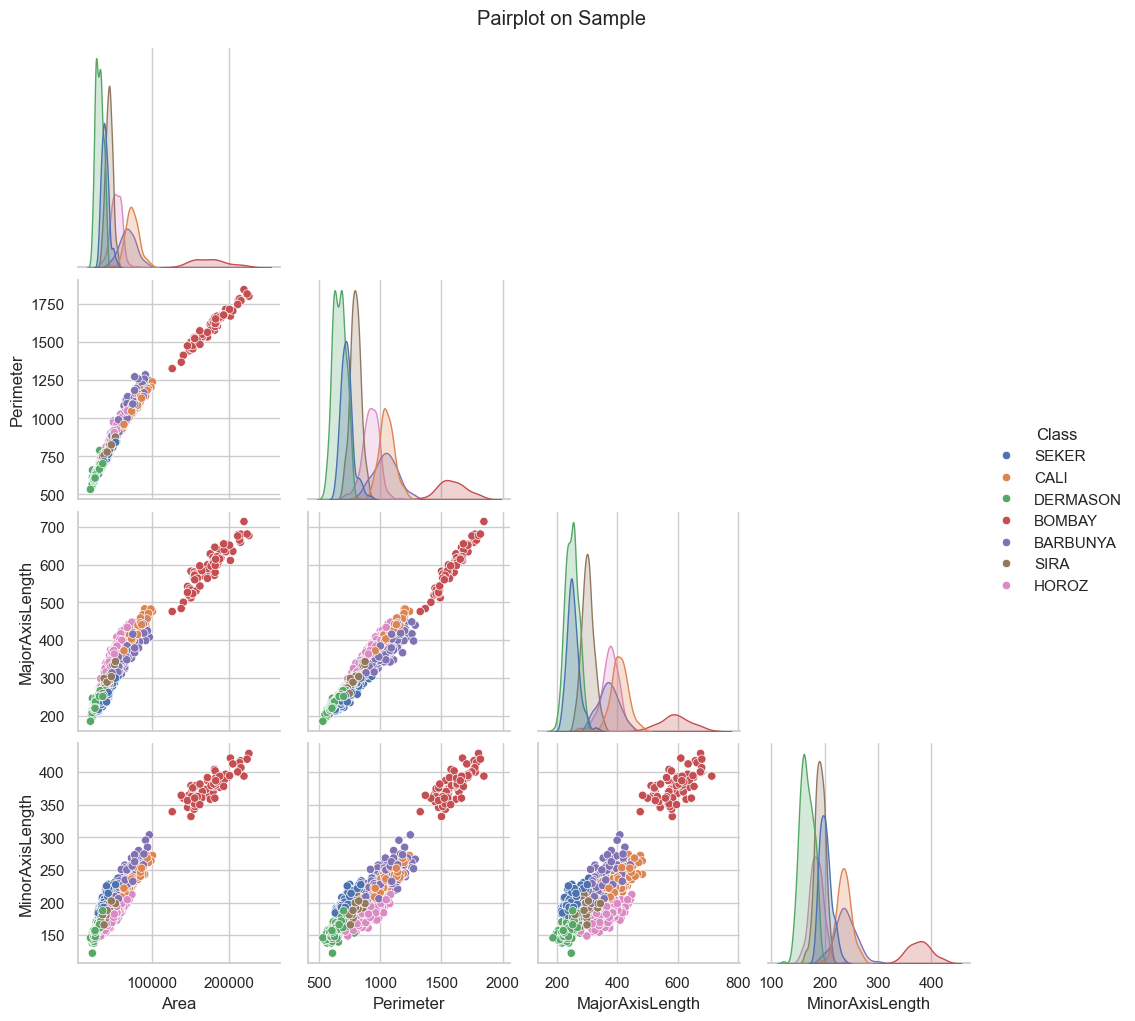

In [108]:
# pairplot on a sample (to avoid heavy computation)
sample_df = df.sample(1500, random_state=42)
sns.pairplot(sample_df, vars=["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength"],
             hue="Class", diag_kind="kde", corner=True)
plt.suptitle("Pairplot on Sample", y=1.02)
plt.show()

In [109]:
# 5. FEATURE ENGINEERING (LIGHT, RELEVANT ONLY)
# Example: ratios that might help classification
df["Area_Perimeter_ratio"] = df["Area"] / (df["Perimeter"] + 1e-6)
df["Major_Minor_ratio"] = df["MajorAxisLength"] / (df["MinorAxisLength"] + 1e-6)
numeric_cols = df.columns.drop("Class")  # update list

In [110]:
# 6. PREPROCESSING – LABEL ENCODING & SCALING
X = df[numeric_cols].values
y = df["Class"].values

In [111]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
# 7. TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)



Train shape: (10834, 18)  Test shape: (2709, 18)


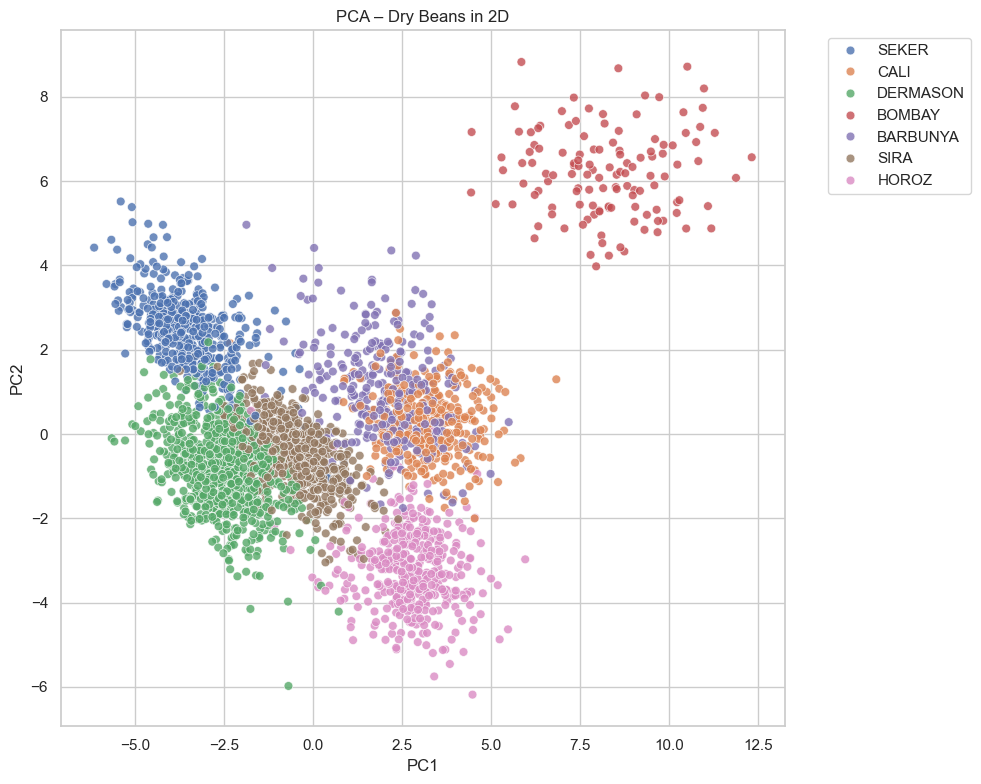

Explained variance by first 2 components: 0.8349083071994657


In [114]:
# 8. PCA FOR VISUALIZATION (UNSUPERVISED DIMENSIONALITY REDUCTION)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Class"] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df.sample(3000, random_state=42),
                x="PC1", y="PC2", hue="Class", s=40, alpha=0.8)
plt.title("PCA – Dry Beans in 2D")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Explained variance by first 2 components:", pca.explained_variance_ratio_.sum())

In [115]:
# 9. SUPERVISED LEARNING – CLASSIFICATION MODELS
#    (Logistic Regression, Random Forest, SVM, MLP)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        max_iter=800,
        early_stopping=True,
        random_state=42
    ),
}
results = []

for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    print(f"{name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    results.append((name, acc, prec, rec, f1))



=== Training LogisticRegression ===
LogisticRegression -> Accuracy: 0.9188, Precision: 0.9194, Recall: 0.9188, F1: 0.9189

=== Training RandomForest ===
RandomForest -> Accuracy: 0.9199, Precision: 0.9200, Recall: 0.9199, F1: 0.9198

=== Training SVM_RBF ===
SVM_RBF -> Accuracy: 0.9206, Precision: 0.9211, Recall: 0.9206, F1: 0.9207

=== Training MLP ===
MLP -> Accuracy: 0.9214, Precision: 0.9215, Recall: 0.9214, F1: 0.9214


In [116]:
# Show model comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\n=== Model Comparison ===")
print(results_df.sort_values(by="F1", ascending=False))


=== Model Comparison ===
                Model  Accuracy  Precision    Recall        F1
3                 MLP  0.921373   0.921505  0.921373  0.921358
2             SVM_RBF  0.920635   0.921069  0.920635  0.920730
1        RandomForest  0.919897   0.919953  0.919897  0.919825
0  LogisticRegression  0.918789   0.919417  0.918789  0.918944



Best model based on F1: MLP

Classification Report for best model:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.94      0.93       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.95      0.95      0.95       406
        SIRA       0.88      0.86      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



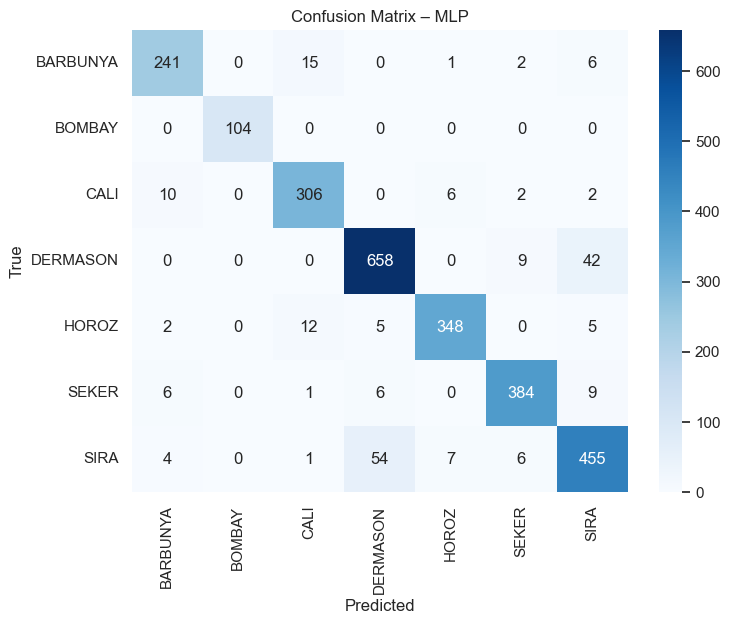

In [117]:
# 10. CHOOSE BEST MODEL (e.g., RANDOM FOREST) FOR DETAILED EVALUATION
best_model_name = results_df.sort_values(by="F1", ascending=False).iloc[0]["Model"]
print("\nBest model based on F1:", best_model_name)

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print("\nClassification Report for best model:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.show()

In [118]:
# Multi-class ROC-AUC (One-vs-Rest) – only if model has predict_proba
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)
    try:
        auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
        print("Multiclass ROC-AUC (OVR, weighted):", round(auc, 4))
    except Exception as e:
        print("ROC-AUC error:", e)

Multiclass ROC-AUC (OVR, weighted): 0.9942


In [119]:
# 11. CROSS-VALIDATION (JOB-READY STEP)
print("\n=== Cross-validation on best model (5-fold) ===")
cv_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5, scoring="accuracy", n_jobs=-1)
print("CV Accuracy scores:", cv_scores)
print("CV Mean Accuracy:", cv_scores.mean())



=== Cross-validation on best model (5-fold) ===
CV Accuracy scores: [0.71797711 0.95533407 0.97969731 0.96750369 0.64217134]
CV Mean Accuracy: 0.8525367054290829


In [120]:
# Optional: Hyperparameter tuning example for RandomForest
# (Keep simple to avoid long runtime)
if best_model_name == "RandomForest":
    param_grid = {
        "n_estimators": [100, 200],
        "max_depth": [None, 20, 40]
    }
    grid = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=-1),
        param_grid,
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    print("\nBest RF params from GridSearch:", grid.best_params_)
    print("Best RF CV score:", grid.best_score_)

In [121]:
# 12. UNSUPERVISED LEARNING – K-MEANS CLUSTERING
# Use all scaled features for KMeans
k = 7  # we know there are 7 bean classes
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

print("\nK-Means inertia:", kmeans.inertia_)
sil = silhouette_score(X_scaled, cluster_labels)
print("K-Means Silhouette Score:", sil)



K-Means inertia: 52446.97262076656
K-Means Silhouette Score: 0.3165135620449497


In [122]:
# Compare clusters with true labels
cluster_vs_class = pd.crosstab(cluster_labels, y)
print("\nCluster vs True Class (K-Means):")
print(cluster_vs_class)



Cluster vs True Class (K-Means):
col_0  BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
row_0                                                      
0           122       0    24       500     49     96  2316
1             0     521     0         0      0      0     0
2            21       0     2       119      0   1879    24
3             9       0    27         7   1597      0    56
4            40       0   279         9    182      2    24
5             0       0     0      2911      2     50   210
6          1130       1  1298         0     30      0     6


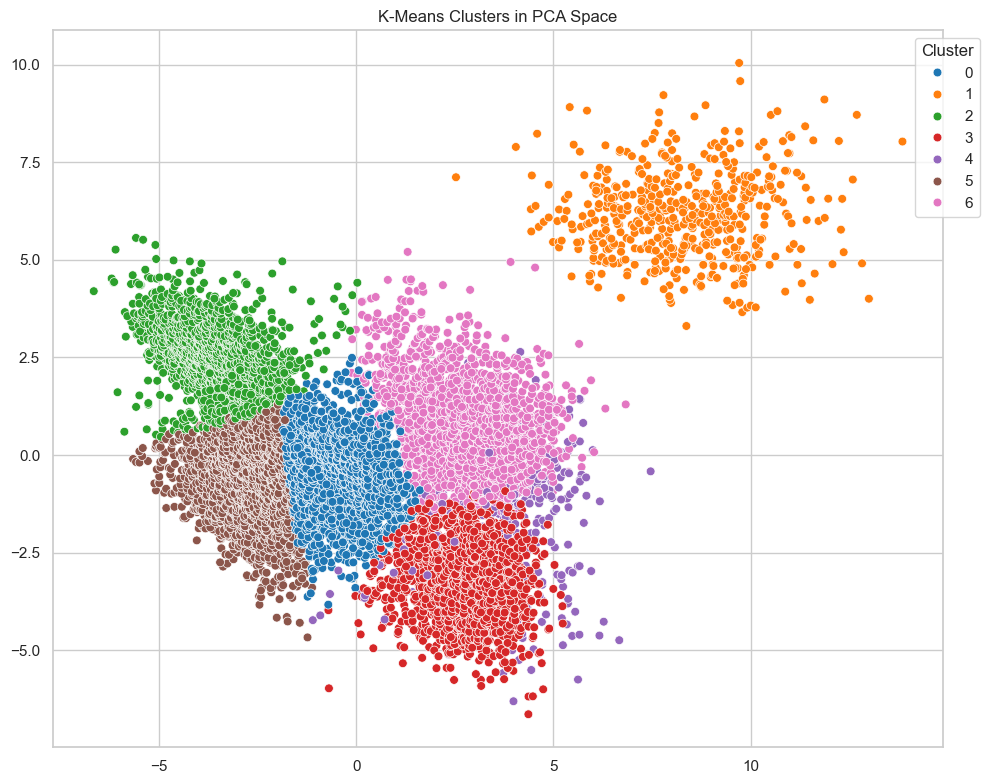

In [123]:
# Visualize clusters in PCA space
pca_kmeans = PCA(n_components=2)
X_pca_kmeans = pca_kmeans.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1],
                hue=cluster_labels, palette="tab10", legend="full", s=40)
plt.title("K-Means Clusters in PCA Space")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [124]:
# 13. UNSUPERVISED LEARNING – HIERARCHICAL CLUSTERING
# Use a sample for hierarchical clustering to keep it fast
sample_X = X_scaled[:1000]

agg = AgglomerativeClustering(n_clusters=7, linkage="ward")
hier_labels = agg.fit_predict(sample_X)

print("\nSample Hierarchical Clustering – Label counts:")
unique, counts = np.unique(hier_labels, return_counts=True)
print(dict(zip(unique, counts)))


Sample Hierarchical Clustering – Label counts:
{np.int64(0): np.int64(302), np.int64(1): np.int64(426), np.int64(2): np.int64(51), np.int64(3): np.int64(22), np.int64(4): np.int64(173), np.int64(5): np.int64(1), np.int64(6): np.int64(25)}


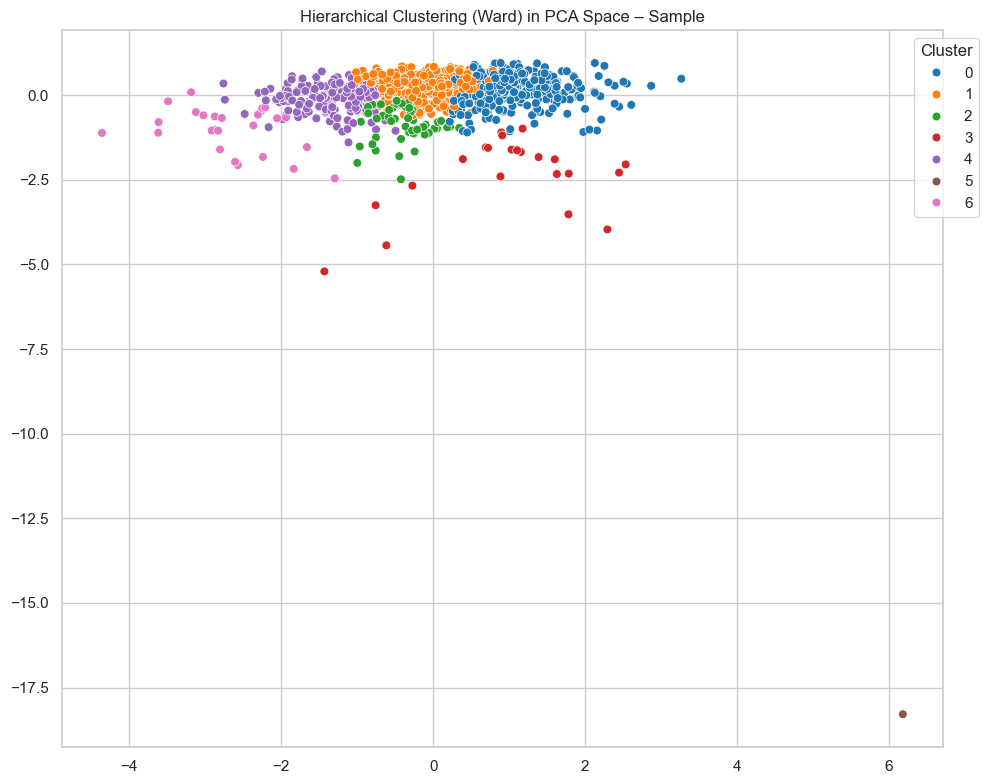


=== END ===


In [95]:
# PCA view for hierarchical clusters
pca_hier = PCA(n_components=2)
sample_pca = pca_hier.fit_transform(sample_X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=sample_pca[:, 0], y=sample_pca[:, 1],
                hue=hier_labels, palette="tab10", s=40)
plt.title("Hierarchical Clustering (Ward) in PCA Space – Sample")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

print("\n=== END ===")